### 크롤링
- 웹 페이지를 그대로 가져와서 가져온 페이지에서 데이터를 추출해 내는 행위

## Requests 사용법

In [1]:
# 서버에 페이지 정보를 요청할 때 사용하는 라이브러리
import requests as req

In [2]:
url = 'https://www.naver.com/'
res = req.get(url)
res
# < Response [200] > : 응답 성공

<Response [200]>

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
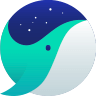
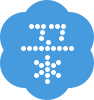

In [3]:
# html 코드 정보 보기 .text
res.text

### BeautifulSoup 사용하기
- 가져온 html 코드에서 내가 원하는 내용만 추출할때 사용

In [4]:
from bs4 import BeautifulSoup as bs

In [5]:
# 파싱 : 데이터의 형태 변환 ( 파싱할 데이터, 파싱방법 )
soup = bs(res.text, 'lxml')

In [6]:
# a 태그 이면서 클래스 명이 nav 인 첫번째 것 찾기
soup.select_one('a.nav')

<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>

In [7]:
# a 태그 이면서 클래스 명이 nav 인 것 전부 찾기
# 리스트로 표현됨
soup.select('a.nav')

[<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>,
 <a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a>,
 <a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a>,
 <a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a>,
 <a class="nav shop" data-clk="svc.shopping" href="https://shopping.naver.com/"><span class="blind">쇼핑</span></a>,
 <a class="nav shoplive" data-clk="svc.shoppinglive" href="https://shoppinglive.naver.com/home"><span class="blind">쇼핑LIVE</span></a>,
 <a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a>,
 <a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>,
 <a class="nav" data-clk="svc.dic" href="https://dict.naver.com/">사전</a>,
 <a class="nav" data-clk="svc.news" href="https://news.naver.com/">뉴스</a>,
 <a class="nav" data-clk="svc.stock" href="https://finance.naver.com/">증권</a>,


In [8]:
# 인덱싱
print(soup.select('a.nav')[2])
soup.select('a.nav')[2].text

<a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a>


'블로그'

In [9]:
url2 = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EA%B4%91%EC%A3%BC%EB%82%A0%EC%94%A8'
res = req.get(url2)
res

<Response [200]>

In [10]:
soup2 = bs(res.text, 'lxml')

In [11]:
 # > 로 자식만 가져오면 스트롱만 나온다!
soup2.select('div.temperature_text>strong')

[<strong><span class="blind">현재 온도</span>5<span class="celsius">°</span></strong>,
 <strong><span class="blind">예측 온도</span>-4<span class="celsius">°</span></strong>,
 <strong><span class="blind">예측 온도</span>8<span class="celsius">°</span></strong>,
 <strong><span class="blind">예측 온도</span>-3<span class="celsius">°</span></strong>,
 <strong><span class="blind">예측 온도</span>8<span class="celsius">°</span></strong>]

In [12]:
soup2.select('div.temperature_text>strong')[0]

<strong><span class="blind">현재 온도</span>5<span class="celsius">°</span></strong>

In [13]:
soup2.select('div.temperature_text')[0].text

' 현재 온도5° '

In [14]:
type(soup2.select('div.temperature_text')[0].text)

str

In [15]:
soup2.select('div.temperature_text')[0].text[6]

'5'

### 멜론차트 수집

In [16]:
url = 'https://www.melon.com/chart/index.htm'
res = req.get(url)
res
# < Response [406] > : 응답 실패

<Response [406]>

In [17]:
# User-Agent 정보를 가져와 딕셔너리로 변환
h = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'}

In [18]:
res = req.get(url, headers = h)
res

<Response [200]>

In [19]:
soup3 = bs(res.text, 'lxml')

In [20]:
len(soup3.select('div.ellipsis'))

300

In [21]:
soup3.select('div.ellipsis')[0].text[1:-1]

'Counting Stars (Feat. Beenzino)'

In [22]:
# 노래제목 3의 배수
# 3의배수 -1 앨범
soup3.select('div.ellipsis')[5].text

'\n쇼미더머니 10 Episode 2\n'

In [23]:
song = []
for i in range(0,300,3) :
    song.append(soup3.select('div.ellipsis')[i].text[1:-1])

song

['Counting Stars (Feat. Beenzino)',
 '회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)',
 '사랑은 늘 도망가',
 '리무진 (Feat. MINO) (Prod. GRAY)',
 '겨울잠',
 'ELEVEN',
 '취중고백',
 '만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL)',
 '눈이 오잖아(Feat.헤이즈)',
 'Dreams Come True',
 'strawberry moon',
 '드라마',
 '다정히 내 이름을 부르면',
 '불협화음 (Feat. AKMU) (Prod. GRAY)',
 'Savage',
 '신호등',
 'STAY',
 '이제 나만 믿어요',
 'Next Level',
 '흰눈',
 '쉬어 (Feat. MINO) (Prod. GRAY)',
 '네가 없는 밤 (Feat. ASH ISLAND) (Prod. GRAY)',
 '너를 생각해',
 'Wake Up (Prod. 코드 쿤스트)',
 '정거장',
 '그대라는 사치',
 '다시 사랑한다면 (김필 Ver.)',
 'Step Back',
 'Butter',
 'Christmas Tree',
 '별빛 같은 나의 사랑아',
 'OHAYO MY NIGHT',
 '문득',
 'Permission to Dance',
 '잊었니',
 'HERO',
 'My Universe',
 '바라만 본다',
 '낙하 (with 아이유)',
 '끝사랑',
 'Dynamite',
 '우리가 헤어져야 했던 이유',
 '러브레터',
 'Celebrity',
 'Bk Love',
 'Still I Love You',
 'Weekend',
 '그게 더 편할 것 같아 (N번째 연애 X 멜로망스)',
 '헤픈 우연',
 '너',
 '서랍',
 '라일락',
 '밤하늘의 별을(2020)',
 'Bad Habits',
 '고백',
 '이별후회',
 '어떻게 이별까지 사랑하겠어, 널 사랑하는 거지',
 'MBTI (Feat. 쿠기 & 로꼬) (P

In [24]:
# 쉬운 방법
title = soup3.select('div.ellipsis.rank01 > span > a')

In [25]:
for i in title :
    print(i.text)

Counting Stars (Feat. Beenzino)
회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)
사랑은 늘 도망가
리무진 (Feat. MINO) (Prod. GRAY)
겨울잠
ELEVEN
취중고백
만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL)
눈이 오잖아(Feat.헤이즈)
Dreams Come True
strawberry moon
드라마
다정히 내 이름을 부르면
불협화음 (Feat. AKMU) (Prod. GRAY)
Savage
신호등
STAY
이제 나만 믿어요
Next Level
흰눈
쉬어 (Feat. MINO) (Prod. GRAY)
네가 없는 밤 (Feat. ASH ISLAND) (Prod. GRAY)
너를 생각해
Wake Up (Prod. 코드 쿤스트)
정거장
그대라는 사치
다시 사랑한다면 (김필 Ver.)
Step Back
Butter
Christmas Tree
별빛 같은 나의 사랑아
OHAYO MY NIGHT
문득
Permission to Dance
잊었니
HERO
My Universe
바라만 본다
낙하 (with 아이유)
끝사랑
Dynamite
우리가 헤어져야 했던 이유
러브레터
Celebrity
Bk Love
Still I Love You
Weekend
그게 더 편할 것 같아 (N번째 연애 X 멜로망스)
헤픈 우연
너
서랍
라일락
밤하늘의 별을(2020)
Bad Habits
고백
이별후회
어떻게 이별까지 사랑하겠어, 널 사랑하는 거지
MBTI (Feat. 쿠기 & 로꼬) (Prod. GRAY)
찰나가 영원이 될 때 (The Eternal Moment)
사이렌 Remix (Feat. UNEDUCATED KID, Paul Blanco)
모든 날, 모든 순간 (Every day, Every Moment)
안녕 우린 헤어져야만 해
롤린 (Rollin')
추억은 만남보다 이별에 남아
내 손을 잡아
매일 크리스마스 (Everyday Christmas)
Dun Dun Dance
밝게 빛나는 

In [26]:
# :nth - child(1) : 자식 중 첫번째
singer = soup3.select('div.ellipsis.rank02 > a:nth-child(1)')
singer

[<a href="javascript:melon.link.goArtistDetail('2758756');" title="BE'O (비오) - 페이지 이동">BE'O (비오)</a>,
 <a href="javascript:melon.link.goArtistDetail('2561475');" title="sokodomo - 페이지 이동">sokodomo</a>,
 <a href="javascript:melon.link.goArtistDetail('994944');" title="임영웅 - 페이지 이동">임영웅</a>,
 <a href="javascript:melon.link.goArtistDetail('2758756');" title="BE'O (비오) - 페이지 이동">BE'O (비오)</a>,
 <a href="javascript:melon.link.goArtistDetail('261143');" title="아이유 - 페이지 이동">아이유</a>,
 <a href="javascript:melon.link.goArtistDetail('3055146');" title="IVE (아이브) - 페이지 이동">IVE (아이브)</a>,
 <a href="javascript:melon.link.goArtistDetail('839736');" title="김민석 (멜로망스) - 페이지 이동">김민석 (멜로망스)</a>,
 <a href="javascript:melon.link.goArtistDetail('241227');" title="베이식 (Basick) - 페이지 이동">베이식 (Basick)</a>,
 <a href="javascript:melon.link.goArtistDetail('2138620');" title="이무진 - 페이지 이동">이무진</a>,
 <a href="javascript:melon.link.goArtistDetail('2899555');" title="aespa - 페이지 이동">aespa</a>,
 <a href="javascript:m

In [27]:
title_list =[]
singer_list = []
rank_list = []

for i in range(len(title)) :
    title_list.append(title[i].text)
    singer_list.append(singer[i].text)
    rank_list.append(i+1)

In [28]:
import pandas as pd

In [29]:
dic = {'노래제목':title_list, '가수': singer_list, '순위':rank_list}

In [34]:
df = pd.DataFrame(dic)
df

,노래제목,가수,순위
0,Counting Stars (Feat. Beenzino),BE'O (비오),1
1,"회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)",sokodomo,2
2,사랑은 늘 도망가,임영웅,3
3,리무진 (Feat. MINO) (Prod. GRAY),BE'O (비오),4
4,겨울잠,아이유,5
...,...,...,...
95,All I Want for Christmas Is You,Mariah Carey,96
96,언덕나무,이승윤,97
97,너와 나의 Memories,염따,98
98,Peaches (Feat. Daniel Caesar & Giveon),Justin Bieber,99


In [35]:
df.set_index('순위', inplace = True)
df

,노래제목,가수
순위,,
1,Counting Stars (Feat. Beenzino),BE'O (비오)
2,"회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)",sokodomo
3,사랑은 늘 도망가,임영웅
4,리무진 (Feat. MINO) (Prod. GRAY),BE'O (비오)
5,겨울잠,아이유
...,...,...
96,All I Want for Christmas Is You,Mariah Carey
97,언덕나무,이승윤
98,너와 나의 Memories,염따
